# Machine Learning Project

## Report on Flipkart Reviews Sentiment Analysis 

### 1. Introduction
Sentiment analysis is an essential task in Natural Language Processing that aims to determine the sentiment conveyed in a piece of text, whether it's positive, negative. In this report, we address the problem of sentiment analysis using machine learning techniques, specifically focusing on two classification algorithms: Decision Tree and Logistic Regression. Our objective is to classify product reviews from an e-commerce platform into positive and negative sentiments.
The problem we aim to solve involves classifying product reviews into positive and negative sentiments based on the ratings provided by users. We believe this task is crucial for businesses to understand customer feedback and make informed decisions. Positive reviews can help businesses understand what customers appreciate about their products and services and help them improve areas that need development. On the other hand, negative reviews can help businesses identify areas that need improvement and take corrective measures
In this report, we employed two classification algorithms: Decision Tree and Logistic Regression. The Decision Tree algorithm creates a tree-like structure to make decisions based on feature values, while the Logistic Regression model estimates the probability of a binary outcome. We selected these algorithms because of their simplicity and effectiveness in solving classification problems


### 2. Future Work
In this section, we discuss future directions for research in sentiment analysis using machine learning algorithms. We suggest several aspects that future work could focus on, such as experimenting with different preprocessing techniques and hyperparameter tuning to improve model performance, investigating the performance of other machine learning algorithms for sentiment analysis, and exploring advanced techniques such as deep learning for sentiment analysis.


### 3. Methodology
To evaluate our approach, we used a dataset containing product reviews from an e-commerce platform. The dataset includes ratings provided by users and corresponding reviews. We preprocessed the text data by removing punctuation, and stopwords, and converting text to lowercase. The preprocessed reviews were then vectorized using the Term Frequency-Inverse Document Frequency (TF-IDF) technique. We split the dataset into training and testing sets (80/20 split). The training set was used to train the classification models, and the testing set was used to evaluate their performance.


In [1]:
## Importing essential libraries and functions
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#Reading Data
df = pd.read_csv(r'flipkart_data.csv')
df

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
...,...,...
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever used....READ MORE,5


In [3]:
#Preprocessing Data
df['label'] = (df['rating'] >= 3).astype(int)

In [4]:
df

,review,rating,label
0,It was nice produt. I like it's design a lot. ...,5,1
1,awesome sound....very pretty to see this nd th...,5,1
2,awesome sound quality. pros 7-8 hrs of battery...,4,1
3,I think it is such a good product not only as ...,5,1
4,awesome bass sound quality very good bettary l...,5,1
...,...,...,...
9971,GoodREAD MORE,5,1
9972,Everything is amazimg but the built is very li...,5,1
9973,GoodREAD MORE,5,1
9974,Best headphone i have ever used....READ MORE,5,1


In [5]:
## Checking for missing values
df.isnull().sum()

review    0
rating    0
label     0
dtype: int64

In [6]:
#import nltk
import nltk 
from nltk.corpus import stopwords
import re 

In [7]:
#Performs text preprocessing on the review column, including removing special characters, tokenization, converting to lowercase, and removing stopwordsstop = set(stopwords.words('english'))
stop.remove('not')
stop.remove('no')
stop.remove('nor')
def preprocess_text(text_data): 
    preprocessed_text = [] 
    for sentence in text_data: 
        sentence = re.sub(r'[^A-Za-z ]', '', sentence) 
        preprocessed_text.append(' '.join(token.lower() for token in nltk.word_tokenize(sentence) if token.lower() not in stop))
    return preprocessed_text

df['p_review'] = preprocess_text(df['review'].astype(str))

In [8]:
df

,review,rating,label,p_review
0,It was nice produt. I like it's design a lot. ...,5,1,nice produt like design lot easy carry looked ...
1,awesome sound....very pretty to see this nd th...,5,1,awesome soundvery pretty see nd sound quality ...
2,awesome sound quality. pros 7-8 hrs of battery...,4,1,awesome sound quality pros hrs battery life in...
3,I think it is such a good product not only as ...,5,1,think good product not per quality also design...
4,awesome bass sound quality very good bettary l...,5,1,awesome bass sound quality good bettary long l...
...,...,...,...,...
9971,GoodREAD MORE,5,1,goodread
9972,Everything is amazimg but the built is very li...,5,1,everything amazimg built lightread
9973,GoodREAD MORE,5,1,goodread
9974,Best headphone i have ever used....READ MORE,5,1,best headphone ever usedread


In [12]:
#Visualizing Word Clouds
from wordcloud import WordCloud

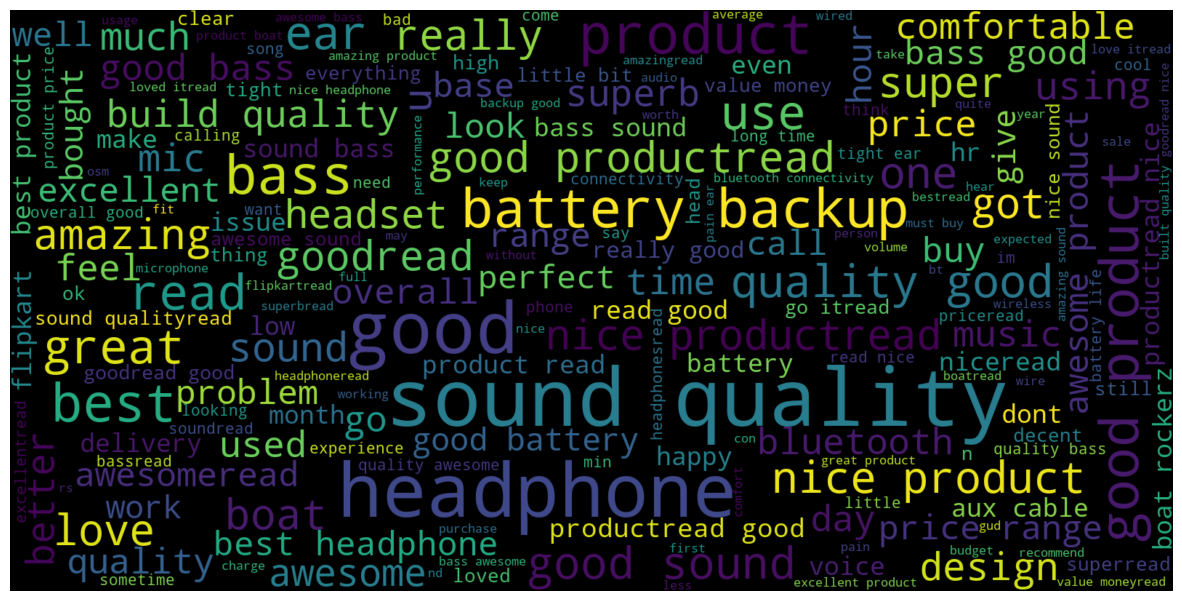

In [13]:
#Generates word clouds for positive and negative reviews using the WordCloud library
consolidated_positive = ' '.join(word for word in df['p_review'][df['label'] == 1])
wordCloud_positive = WordCloud(width=1600, height=800, random_state=21, max_font_size=110) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud_positive.generate(consolidated_positive), interpolation='bilinear') 
plt.axis('off') 
plt.show()

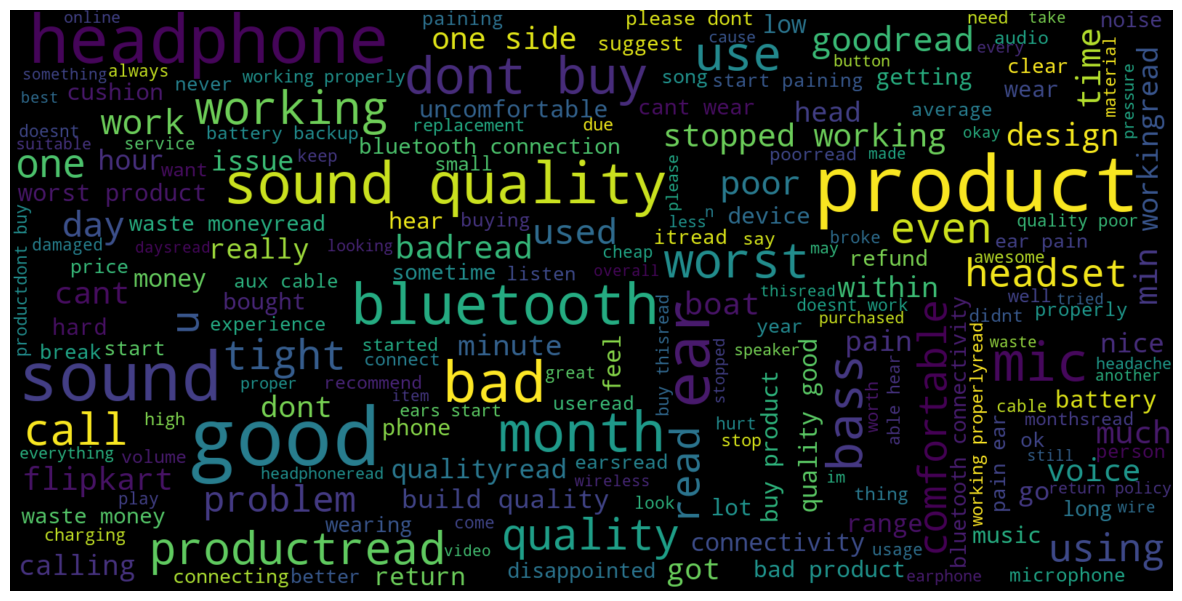

In [14]:
consolidated_negative = ' '.join(word for word in df['p_review'][df['label'] == 0])
wordCloud_negative = WordCloud(width=1600, height=800, random_state=21, max_font_size=110) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud_negative.generate(consolidated_negative), interpolation='bilinear') 
plt.axis('off') 
plt.show()

In [15]:
#Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer 

In [16]:
#Uses TF-IDF vectorization to convert text data into numerical features.
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(df['p_review']).toarray()

In [17]:
#Splits the data into training and testing sets
from sklearn.model_selection import train_test_split 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.20, stratify=df['label'], random_state=42)

In [19]:
#Trains two classification models: Decision Tree and Logistic Regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [20]:
#Evaluates model performance using training accuracy and visualizes confusion matrices
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
print("Decision Tree Train Accuracy:", accuracy_score(y_train, train_pred))

Decision Tree Train Accuracy: 0.9944862155388471


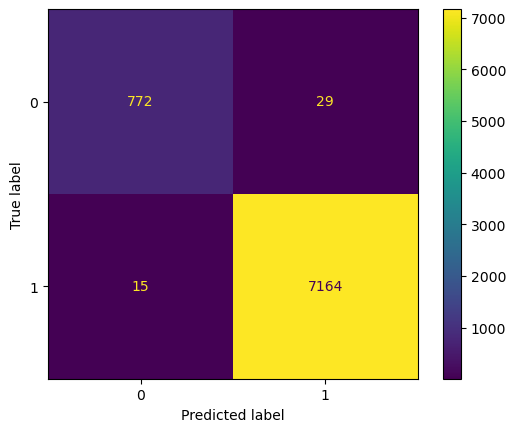

In [21]:
# confusion matrix display
cm = ConfusionMatrixDisplay(confusion_matrix(y_train, train_pred))
cm.plot()

In [22]:
# import logistic regression
from sklearn.linear_model import LogisticRegression

In [23]:
# predicting model
model2 = LogisticRegression()
model2.fit(X_train, y_train)
train_pred2 = model2.predict(X_train)
print("Logistic Regression Train Accuracy:", accuracy_score(y_train, train_pred2))

Logistic Regression Train Accuracy: 0.9360902255639098


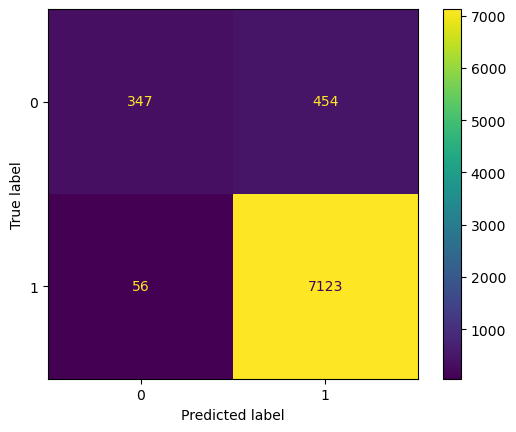

In [24]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_train, train_pred2))
cm.plot()

In [25]:
#Predicting Sentiment
def predict_sentiment(model, review_text):
    preprocessed_review_text = preprocess_text([review_text])
    review_vectorized = cv.transform(preprocessed_review_text).toarray()
    prediction = model.predict(review_vectorized)
    sentiment = "Positive" if prediction[0] == 1 else "Negative"
    return sentiment

In [26]:
#Defines a function to predict sentiment for new review texts using the trained models
review_example1 = "This very product is amazing"
predicted_sentiment1 = predict_sentiment(model, review_example1)
print("Predicted Sentiment for Example Review 1:", predicted_sentiment1)

Predicted Sentiment for Example Review 1: Positive


In [27]:
review_example2 = "Product was bad"
predicted_sentiment2 = predict_sentiment(model, review_example2)
print("Predicted Sentiment for Example Review 2:", predicted_sentiment2)

Predicted Sentiment for Example Review 2: Negative


In [28]:
#import tabulate
from tabulate import tabulate

In [29]:
data = [
    ["Model", "Train Accuracy"],
    ["Decision Tree", accuracy_score(y_train, train_pred)],
    ["Logistic Regression", accuracy_score(y_train, train_pred2)]
]

### 4. Results
The Decision Tree model achieved a training accuracy of  0.994486, while the Logistic Regression model achieved a training accuracy of 0.93609. We also plotted confusion matrices to visualize the performance of the models. The results show that both models achieved reasonable accuracies on the training data. However, we need further analysis to determine the generalization performance on unseen data. The Decision Tree model may be prone to overfitting due to its high training accuracy. On the other hand, Logistic Regression, being a linear model, might generalize better on unseen data. 

In [30]:
#Prints training accuracies of both models and generates a tabulated summary
table = tabulate(data, headers="firstrow", tablefmt="grid")
print(table)

+---------------------+------------------+
| Model               |   Train Accuracy |
+=====================+==================+
| Decision Tree       |         0.994486 |
+---------------------+------------------+
| Logistic Regression |         0.93609  |
+---------------------+------------------+


### 5.Conclusion
In conclusion, this report presented an approach for sentiment analysis using machine learning algorithms. Our study demonstrates the application of Decision Tree and Logistic Regression for sentiment classification of product reviews. While both models show promising results, further experimentation and analysis are necessary to enhance model performance and generalization. We believe that our work contributes to the growing body of research on sentiment analysis and can help businesses make informed decisions based on customer feedback.


### 6.Bibliography
[1] Pang, B., & Lee, L. (2008). Opinion Mining and Sentiment Analysis. Foundations and Trends® in Information Retrieval, 2(1–2), 1–135.

[2] Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.

[3] Jain, S., & Aggarwal, A. (2020). Sentiment Analysis of E-commerce Reviews: A Comparative Study of Machine Learning and Deep Learning Approaches. In Proceedings of the 4th International Conference on Intelligent Computing and Control Systems (ICICCS) (pp. 836-840). IEEE.

[4] Sharma, A., & Singh, R. (2019). Sentiment Analysis of E-commerce Product Reviews Using Machine Learning Techniques. In 2019 IEEE 9th International Conference on Advanced Computing (IACC) (pp. 586-591). IEEE.

[5] Gupta, A., & Kumaraguru, P. (2019). A Comparative Study of Sentiment Analysis Techniques on E-commerce Reviews. In Proceedings of the 10th ACM Conference on Web Science (pp. 131-135). ACM.

